In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


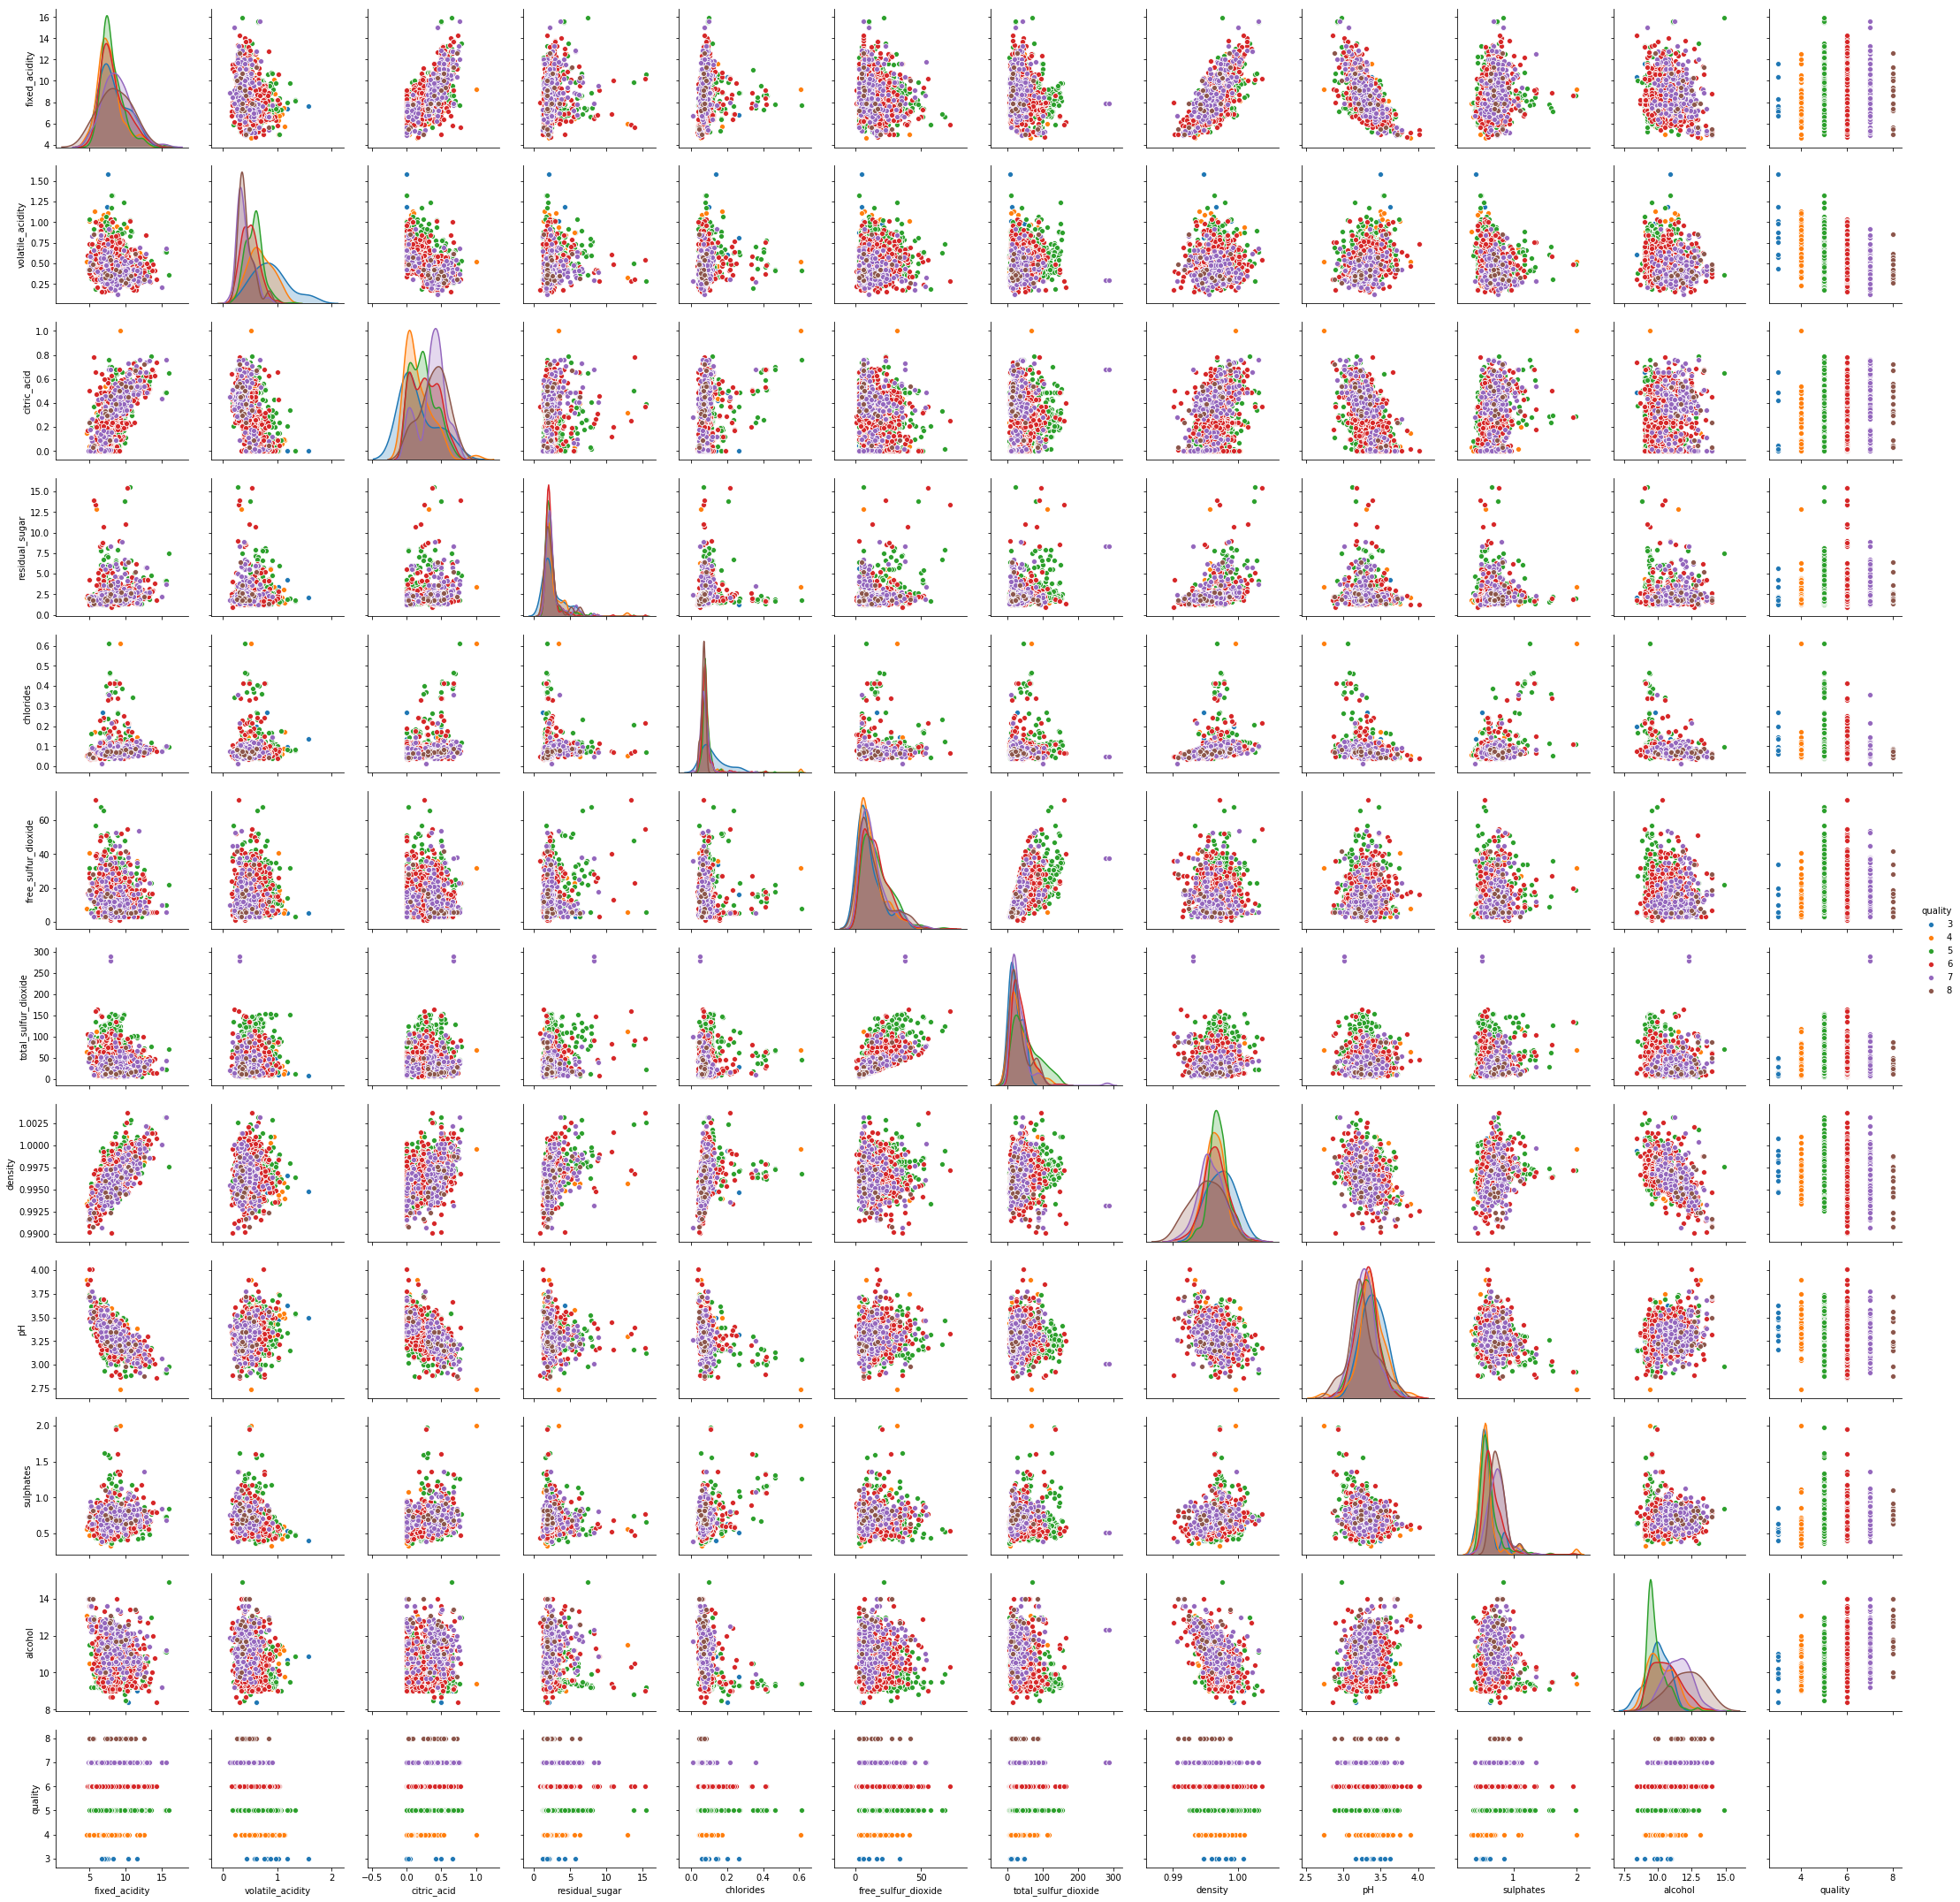

In [32]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='quality')

In [5]:
df2 = df.drop('quality',axis=1)

In [6]:
df2.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

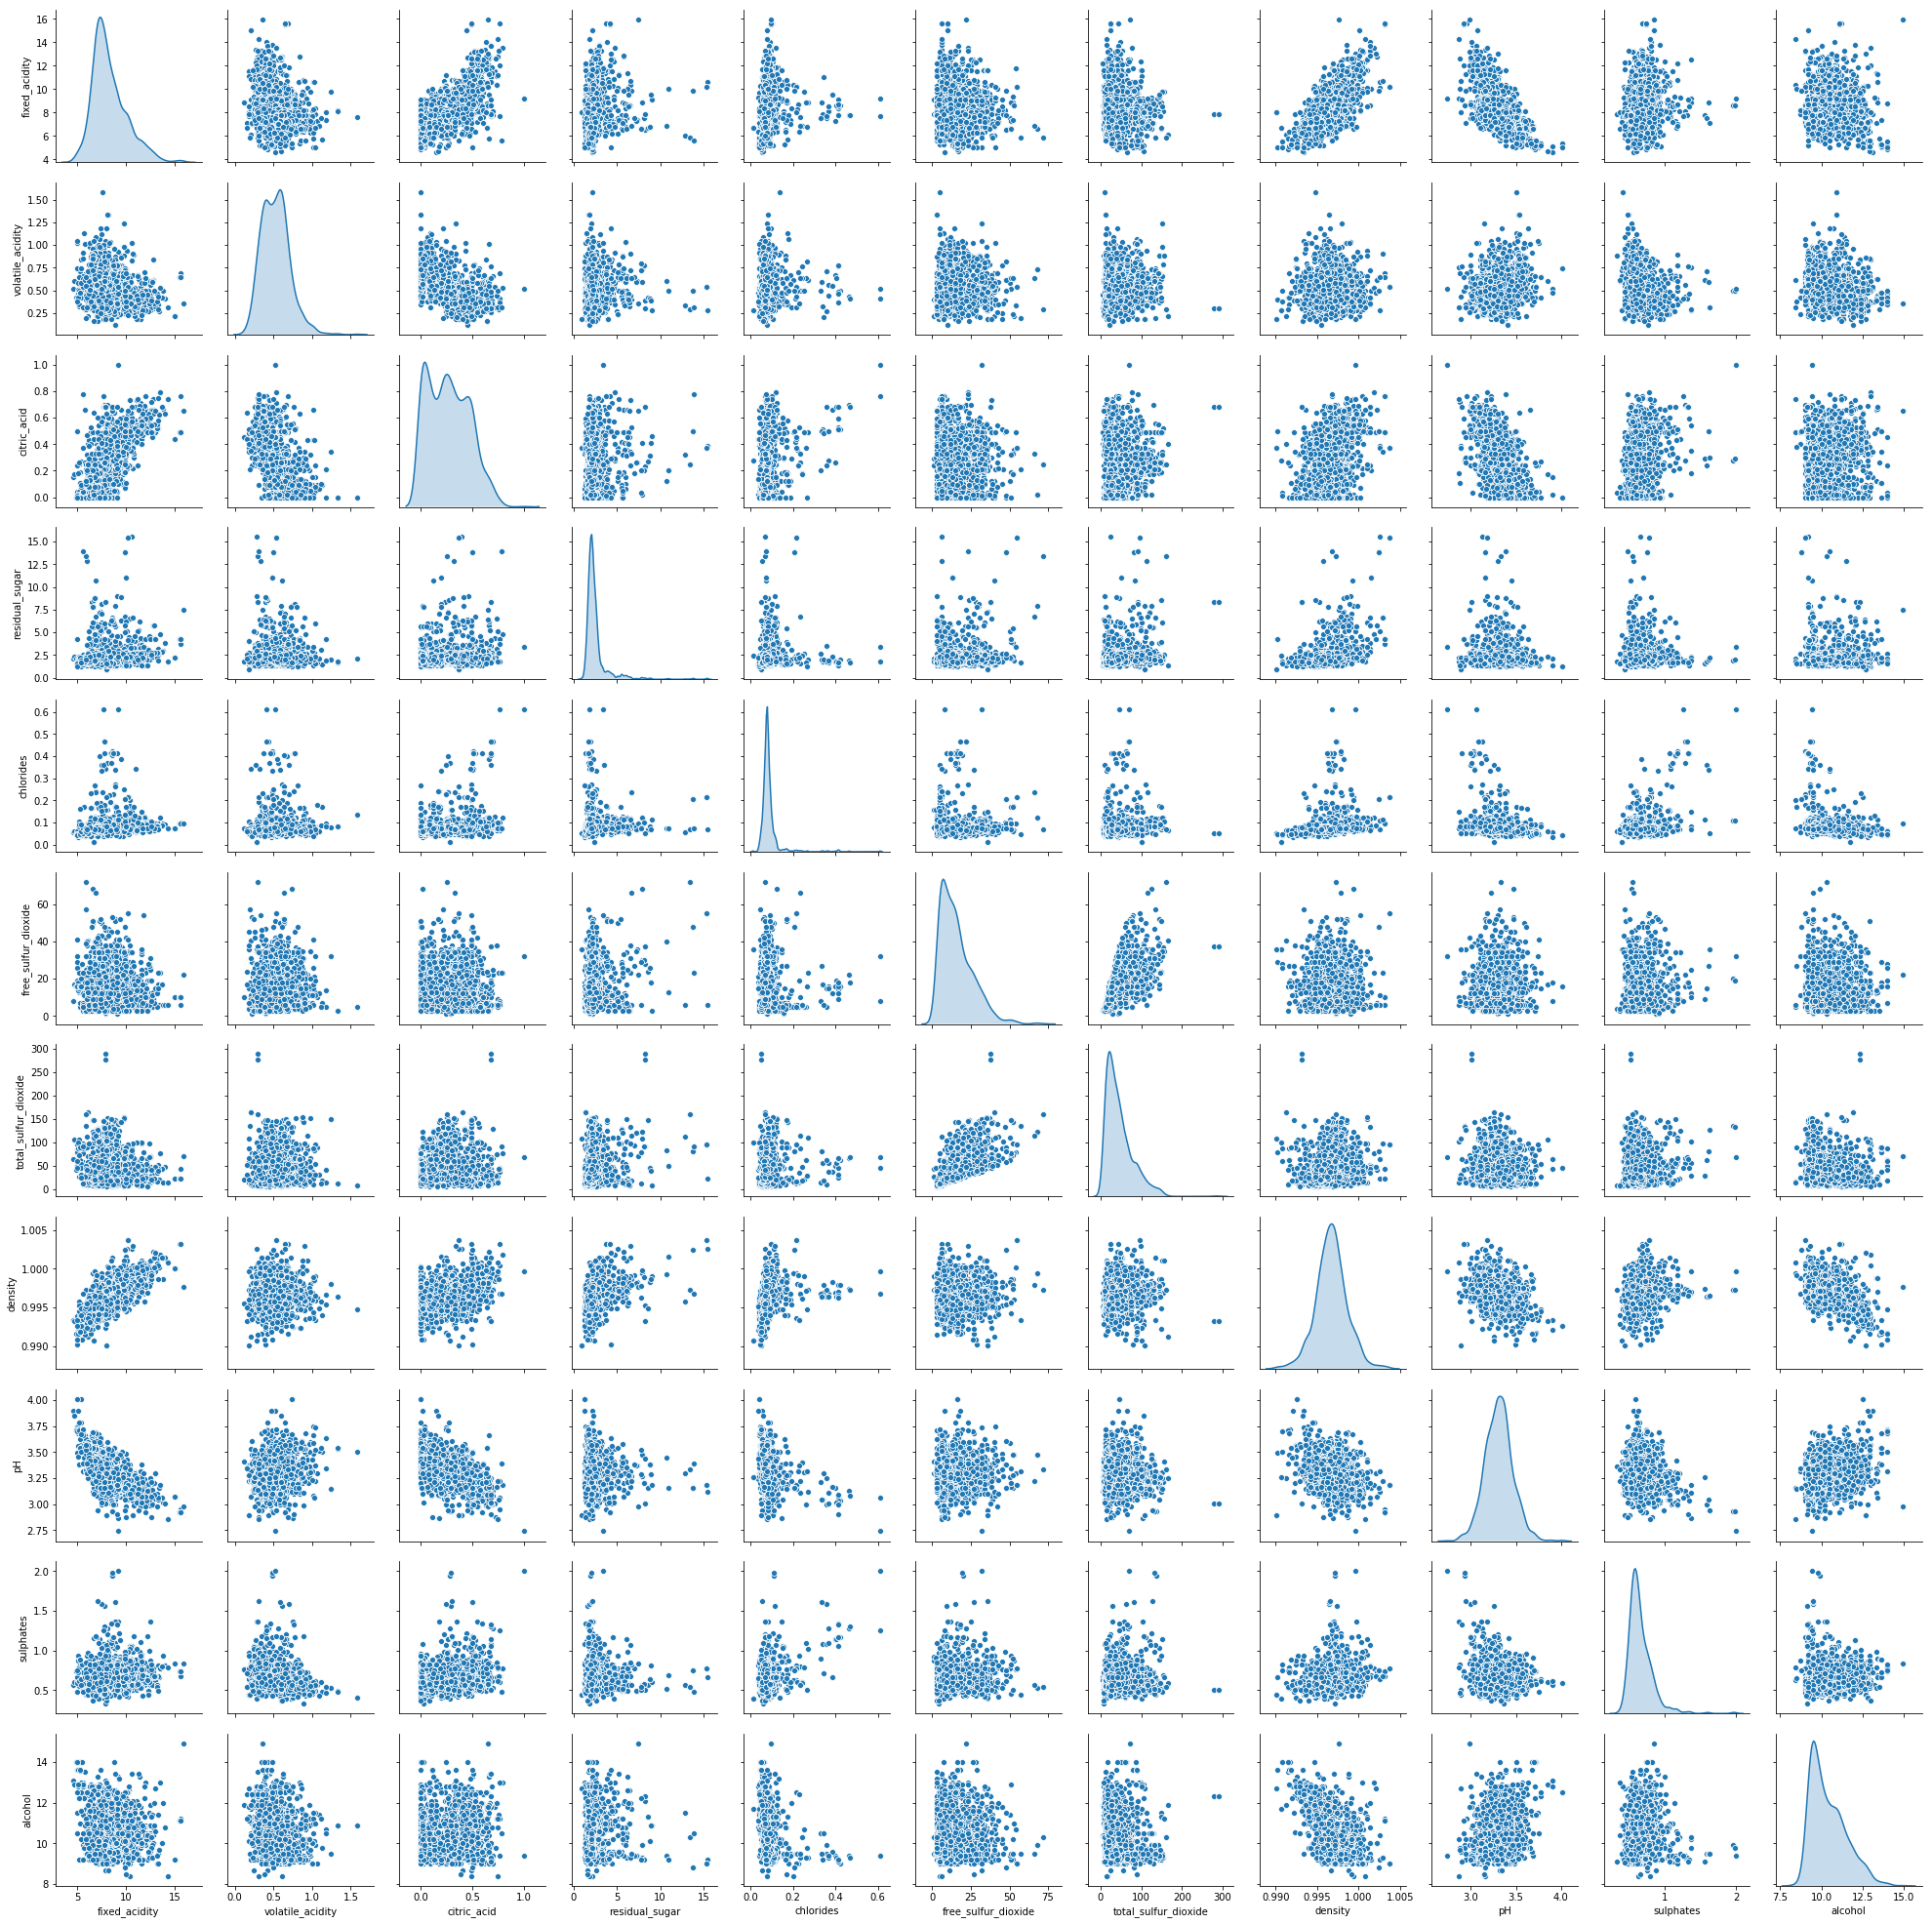

In [8]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [7]:
df_scaled = df2.apply(zscore)


In [8]:
df_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

In [9]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    17589.000000
1              2    14330.119811
2              3    12629.925638
3              4    11459.054180
4              5    10155.374026
5              6     9362.004259
6              7     8645.112929
7              8     8299.467496
8              9     7968.119858
9             10     7702.327060
10            11     7435.694558
11            12     7230.036241
12            13     7009.951604
13            14     6846.050679

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

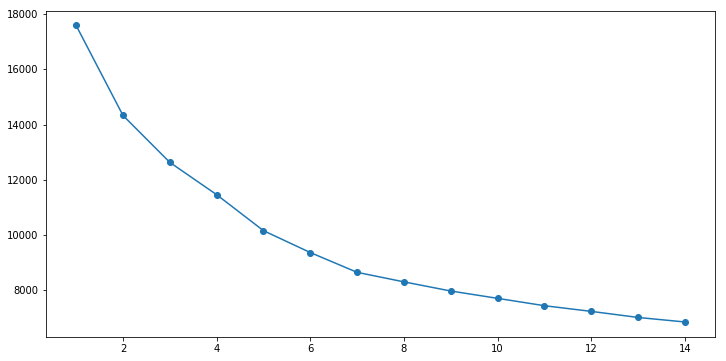

In [10]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [11]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [12]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [13]:
centroids=kmeans.cluster_centers_

In [14]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [15]:
centroid_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.091932          0.040407     0.100025        0.403751  -0.005654   
1       1.003989         -0.685689     1.020772        0.031050   0.276163   
2      -0.649543          0.455192    -0.760494       -0.230415  -0.188823   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             1.068374              1.324583  0.283376 -0.179243  -0.187416   
1            -0.476860             -0.481687  0.438441 -0.752072   0.554620   
2            -0.221560             -0.350743 -0.451009  0.614906  -0.288141   

    alcohol  
0 -0.510528  
1  0.282591  
2  0.067879

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [16]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [17]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [18]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1       -0.298547          1.967442    -1.391472        0.043416   0.223875   
9       -0.470907         -0.155419     0.457144        2.526589  -0.349975   
11      -0.470907         -0.155419     0.457144        2.526589  -0.349975   
14       0.333436          0.514959    -0.467164        0.894790   1.881666   
15       0.333436          0.514959    -0.415813        0.965737   1.754143   

    free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
1              0.872638              0.624363  0.028261 -0.719933   0.128950   
9              0.107592              1.688677  0.558274  0.251958   0.837107   
11             0.107592              1.688677  0.558274  0.251958   0.837107   
14             3.454669              2.996263  0.982285 -0.979104   1.309212   
15             3.359038              3.087490  0.982285 -0.914312   1.604277   

     alcohol labels  
1  -0.584777      0  
9   0.072294      0  
11  0.072294      0  
14 -1.147981      0  
15 -1.147981      0

In [19]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [20]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [21]:
tot_I=I0+I1+I2
print(tot_I)

12629.925637963057


In [23]:
kmeans.inertia_

12629.925637963059

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2137299633547482


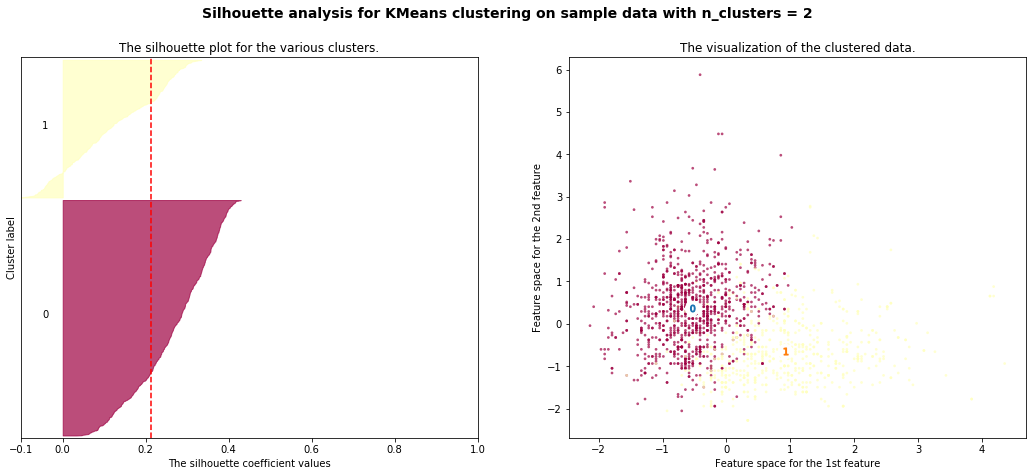

For n_clusters = 3 The average silhouette_score is : 0.18924495959290374


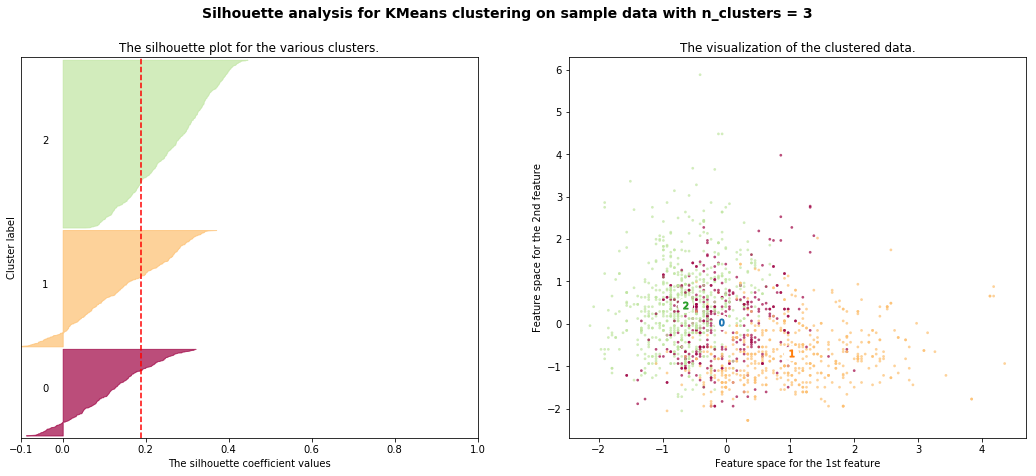

For n_clusters = 4 The average silhouette_score is : 0.1715543880353236


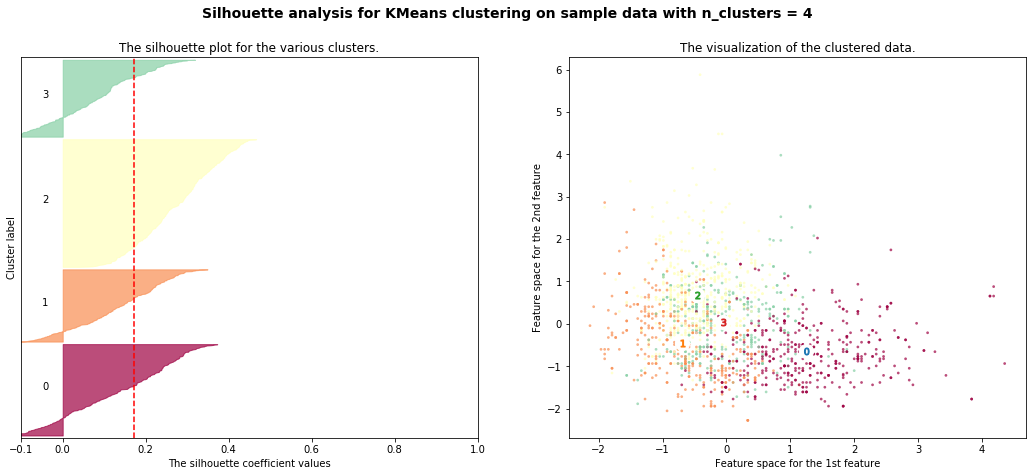

For n_clusters = 5 The average silhouette_score is : 0.1902699335922754


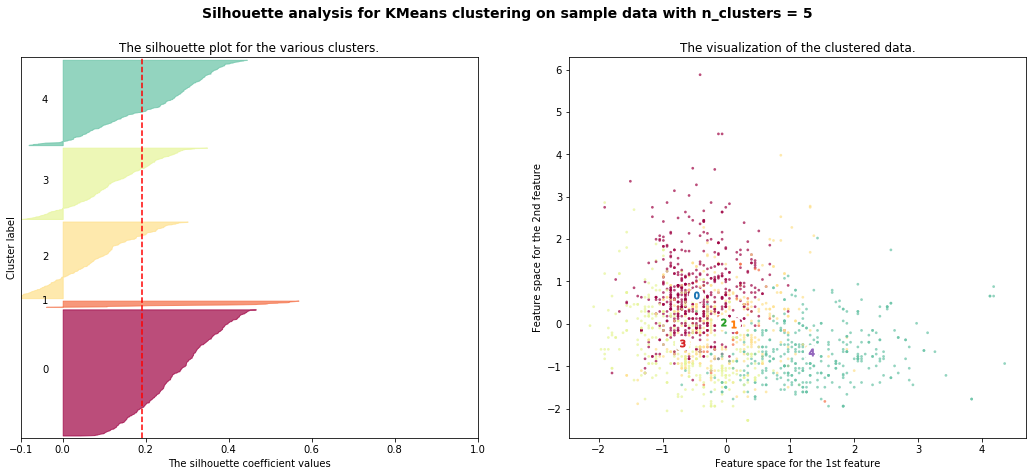

For n_clusters = 6 The average silhouette_score is : 0.19464464600480305


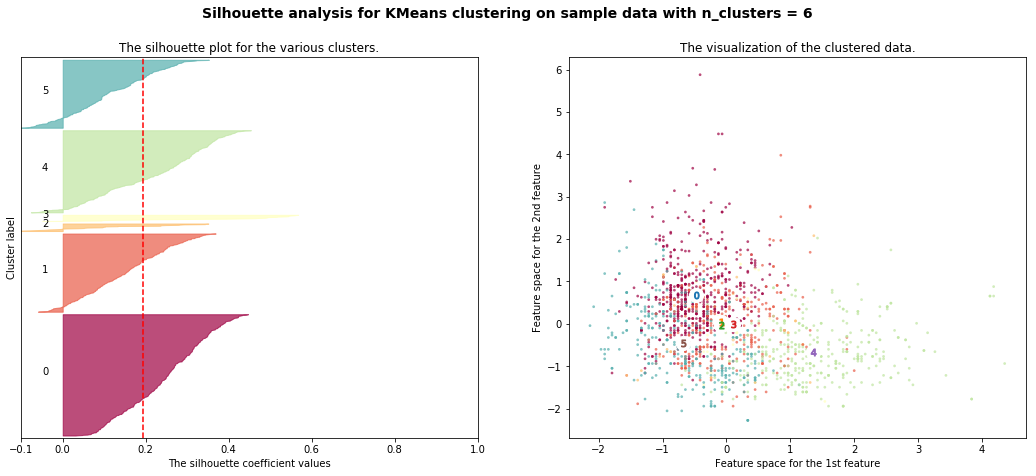

For n_clusters = 7 The average silhouette_score is : 0.19182704275437362


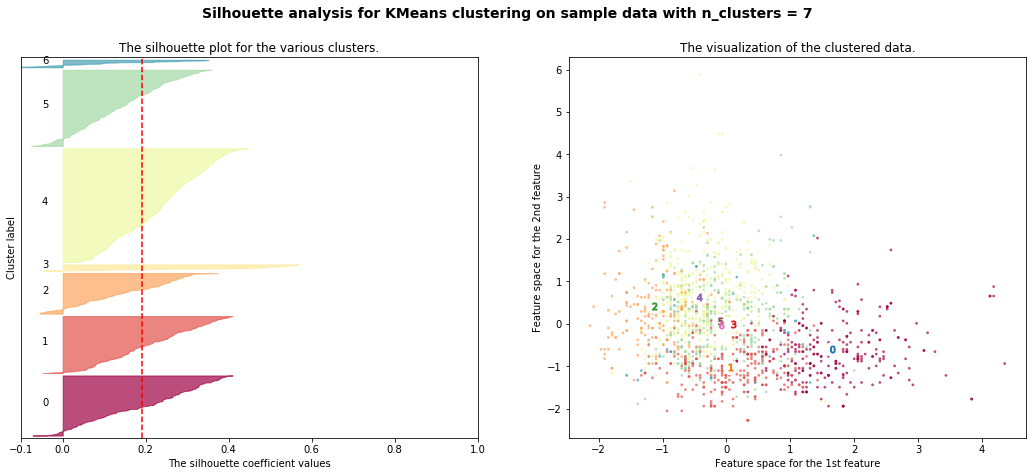

For n_clusters = 8 The average silhouette_score is : 0.1507773904835987


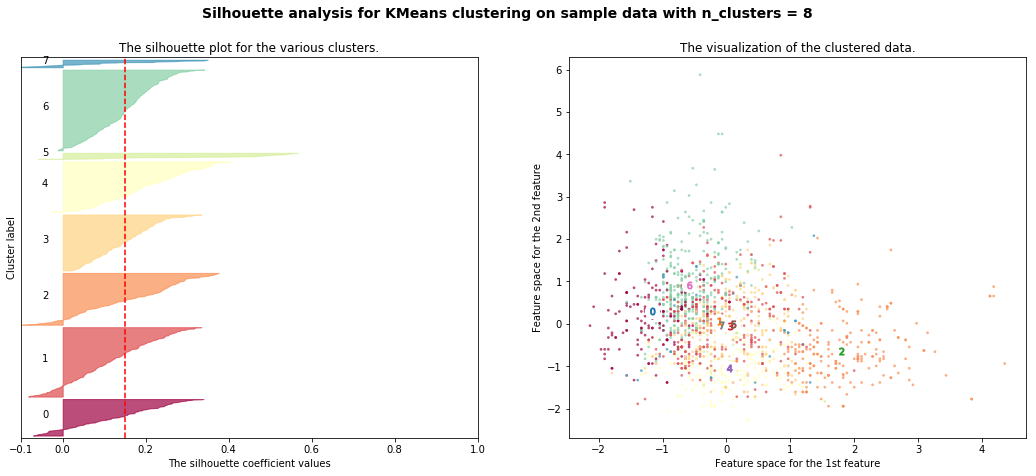

For n_clusters = 9 The average silhouette_score is : 0.1529887010335021


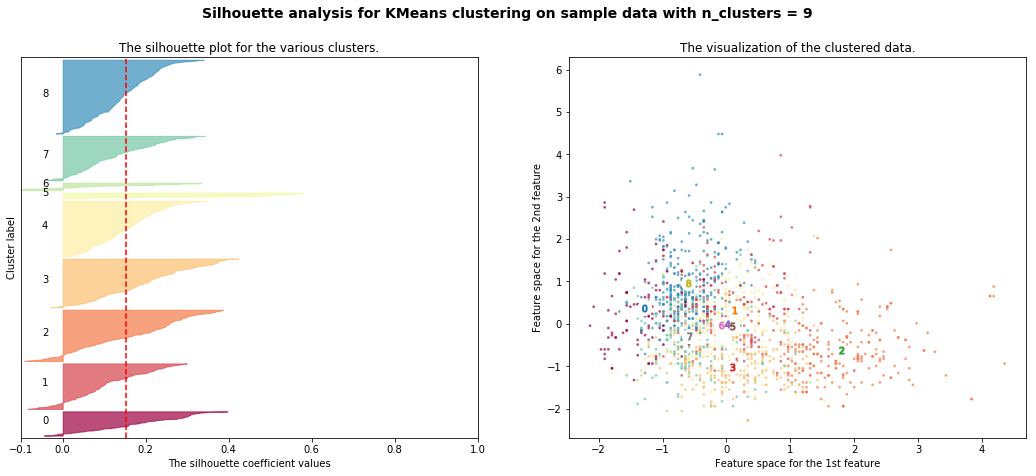

For n_clusters = 10 The average silhouette_score is : 0.1504872224425849


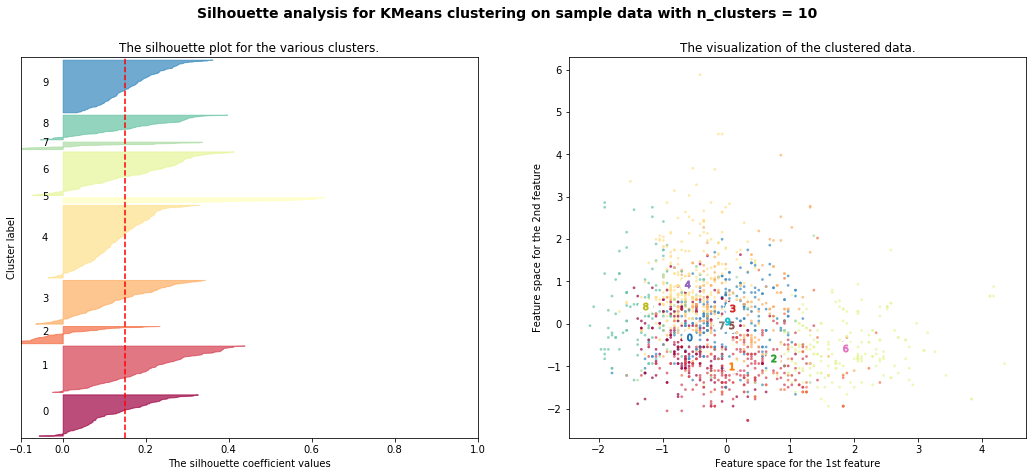

For n_clusters = 11 The average silhouette_score is : 0.15168519161781538


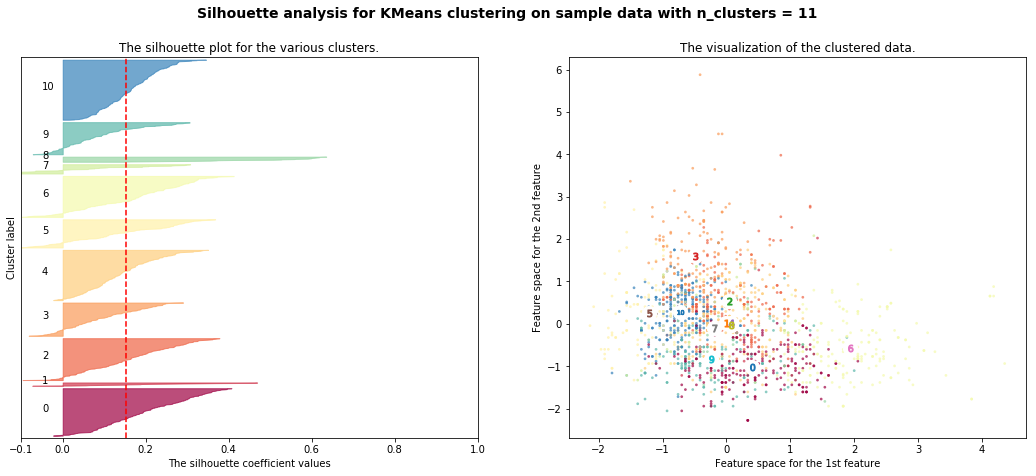

For n_clusters = 12 The average silhouette_score is : 0.1371836401781687


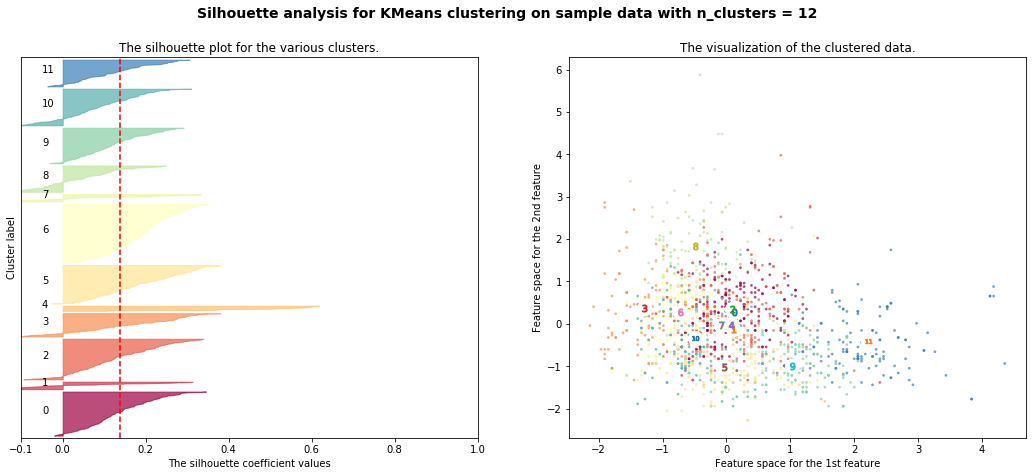

For n_clusters = 13 The average silhouette_score is : 0.14318489192315806


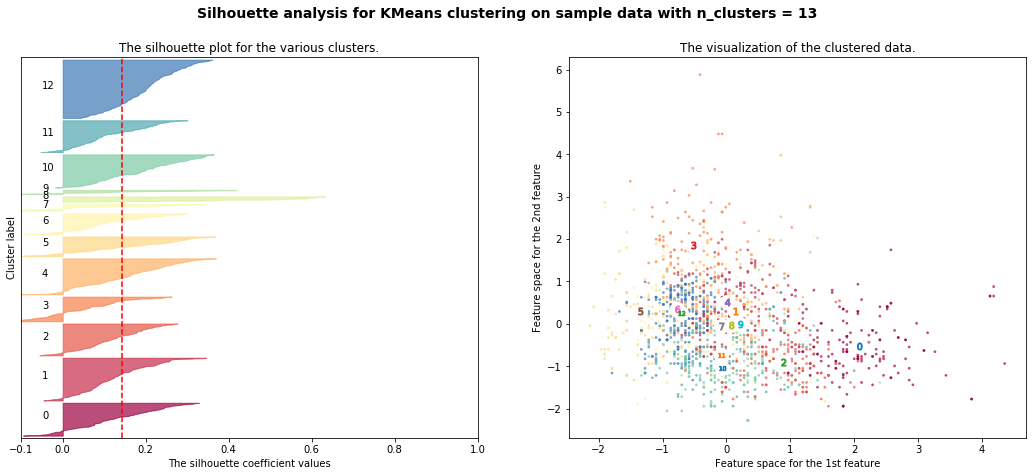

For n_clusters = 14 The average silhouette_score is : 0.15113293257406113


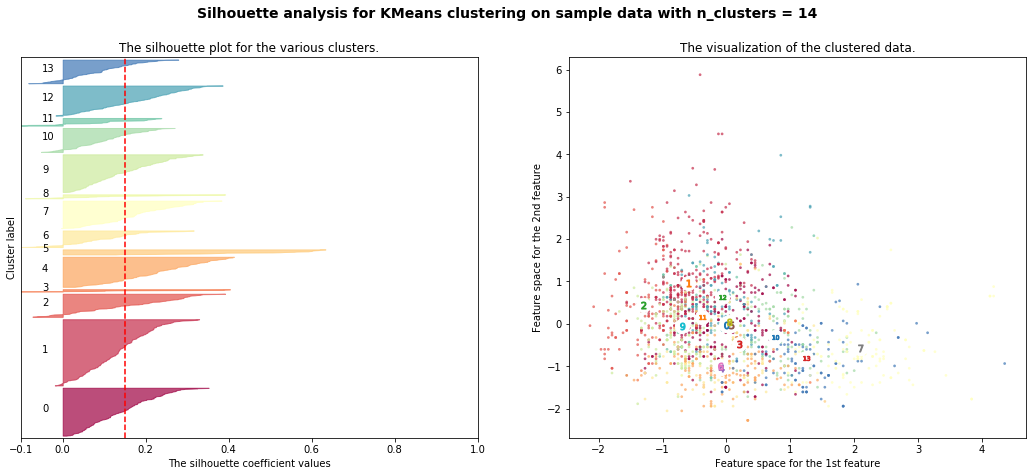

For n_clusters = 15 The average silhouette_score is : 0.14033694483551878


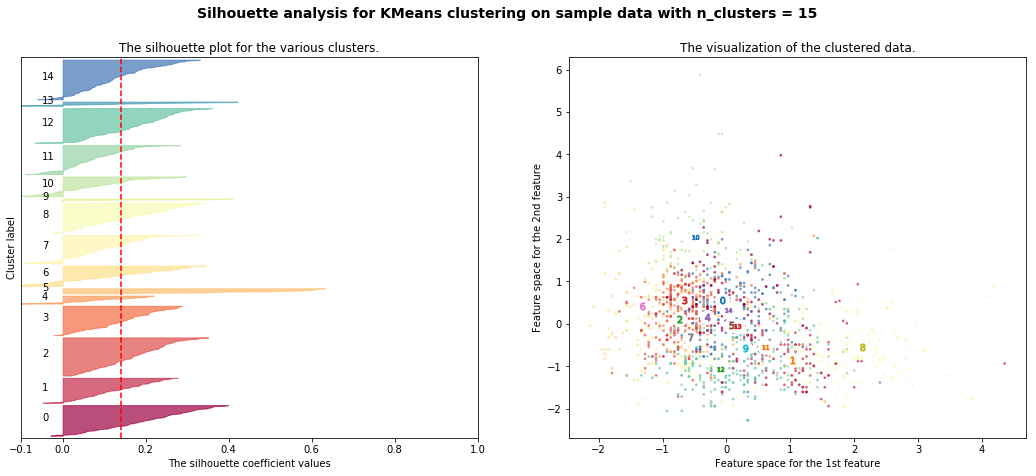

In [24]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

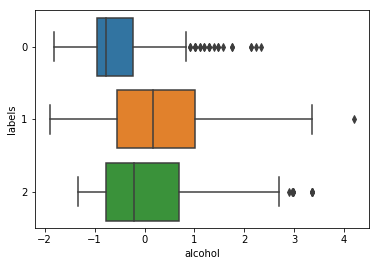

In [26]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F150AC3E48>,
      dtype=object)

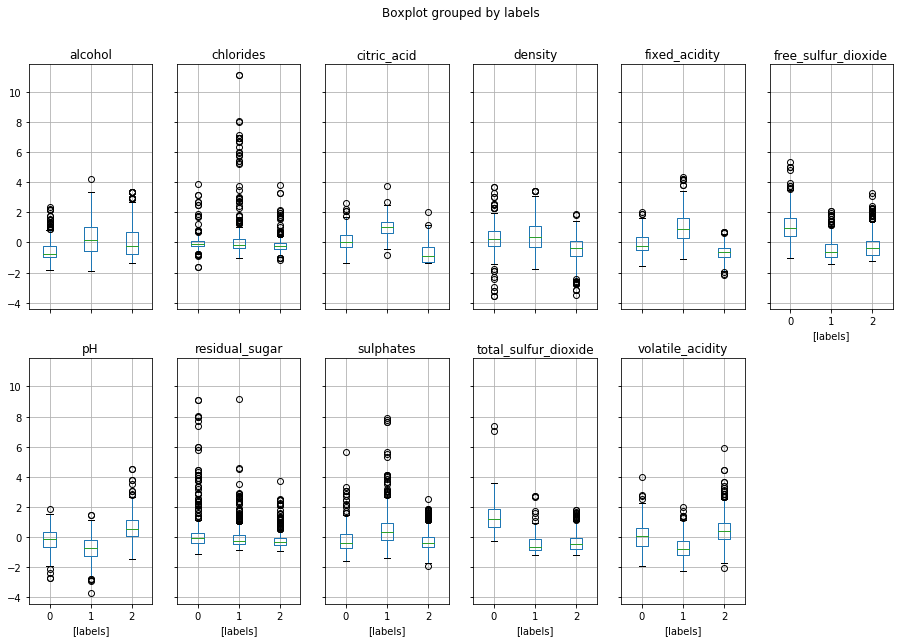

In [27]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

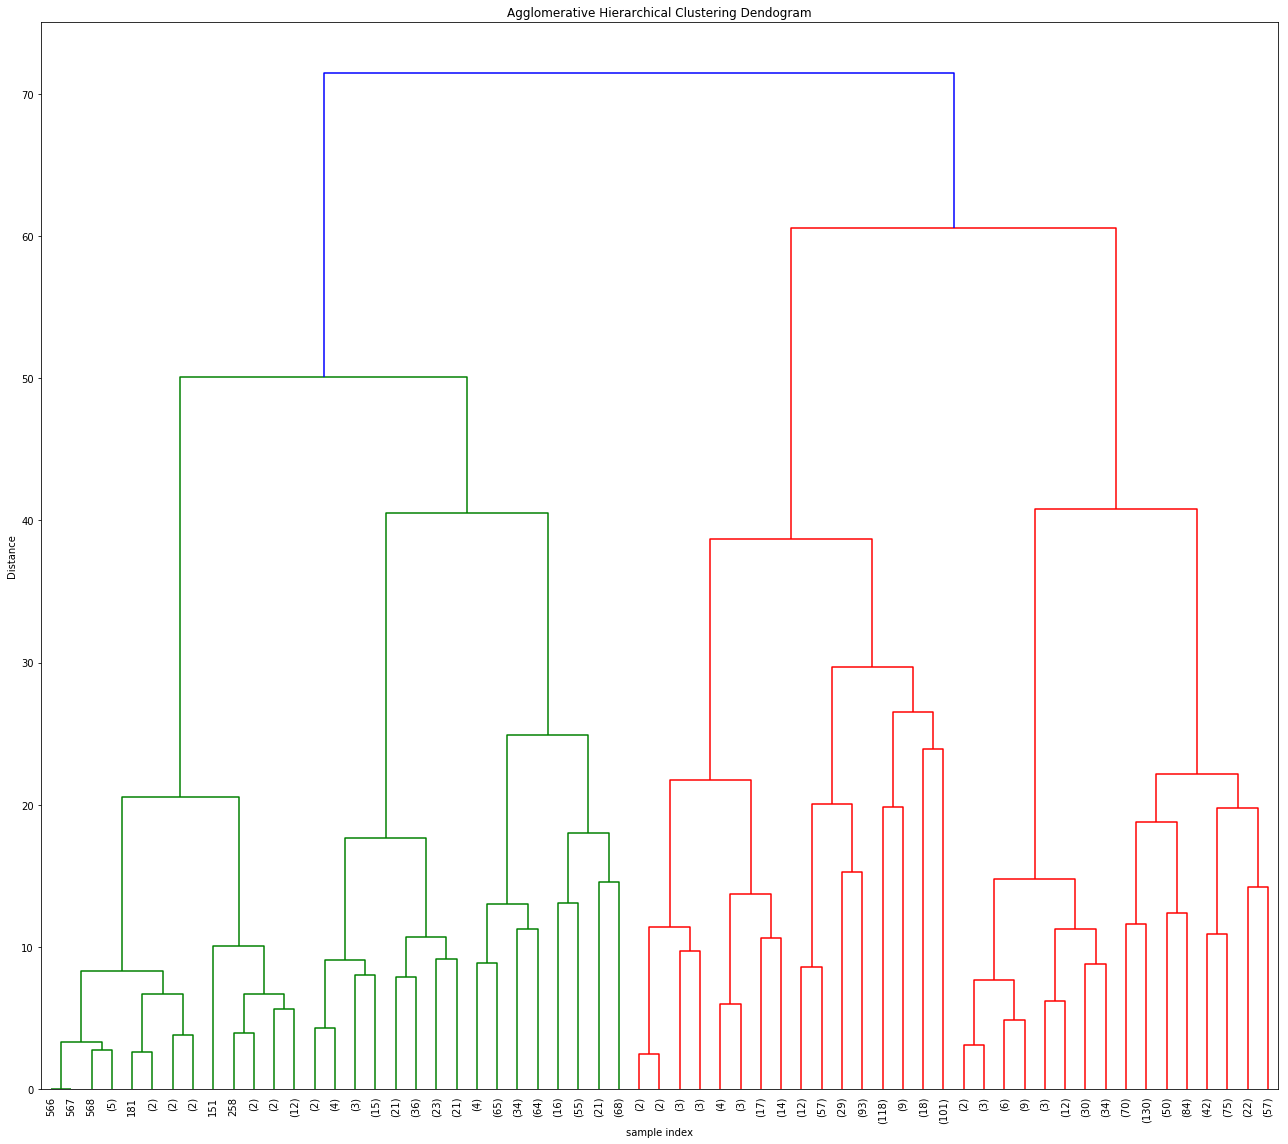

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [28]:
df_scaled=df_scaled[['citric_acid']]
df_scaled.head()

citric_acid
0    -1.391472
1    -1.391472
2    -1.186070
3     1.484154
4    -1.391472

In [29]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1     1599.000000
1              2      449.684256
2              3      196.501569
3              4      114.536873
4              5       74.984001
5              6       50.988268
6              7       36.309209
7              8       29.299793
8              9       23.049484
9             10       19.540710
10            11       16.058039
11            12       13.644235
12            13       11.857336
13            14       10.173726

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

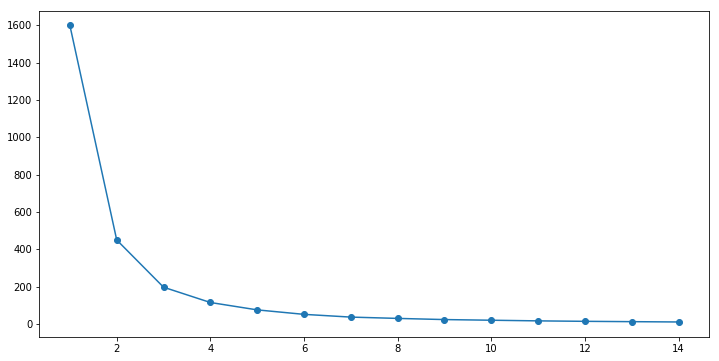

In [30]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [31]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [32]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [33]:
centroids=kmeans.cluster_centers_

In [34]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [35]:
centroid_df

citric_acid
0     1.248725
1    -1.103553
2     0.024561

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [36]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [37]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [38]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

citric_acid labels
3      1.484154      0
16     1.484154      0
19     1.227401      0
20     1.073350      0
46     0.816598      0

In [39]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [40]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [41]:
tot_I=I0+I1+I2
print(tot_I)

196.50156861964615


In [42]:
kmeans.inertia_

196.50156861964615

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6084479023168635
For n_clusters = 3 The average silhouette_score is : 0.6108122167861991
For n_clusters = 4 The average silhouette_score is : 0.6111915688528065
For n_clusters = 5 The average silhouette_score is : 0.5954859662782966
For n_clusters = 6 The average silhouette_score is : 0.5910564941236786
For n_clusters = 7 The average silhouette_score is : 0.5963076688586996
For n_clusters = 8 The average silhouette_score is : 0.5879810561377012
For n_clusters = 9 The average silhouette_score is : 0.5922327474205464
For n_clusters = 10 The average silhouette_score is : 0.5971169987512872
For n_clusters = 11 The average silhouette_score is : 0.5969681025095974
For n_clusters = 12 The average silhouette_score is : 0.5812392591553167
For n_clusters = 13 The average silhouette_score is : 0.5900656717810767
For n_clusters = 14 The average silhouette_score is : 0.58852874824

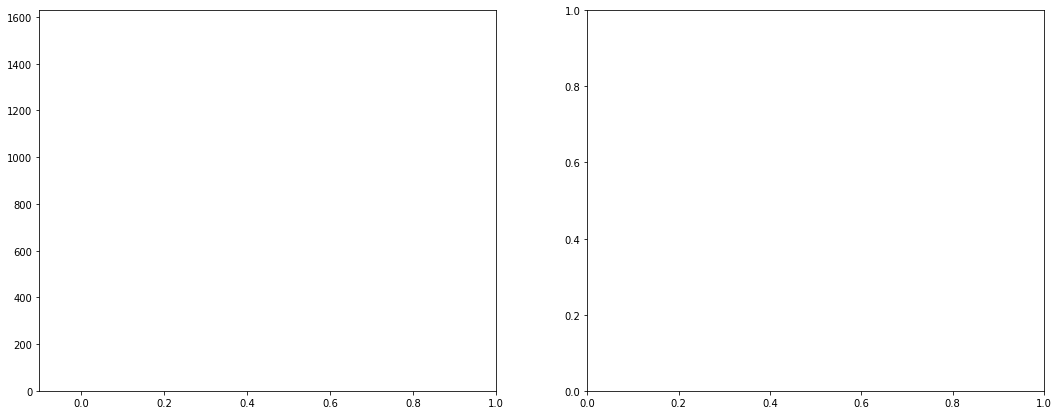

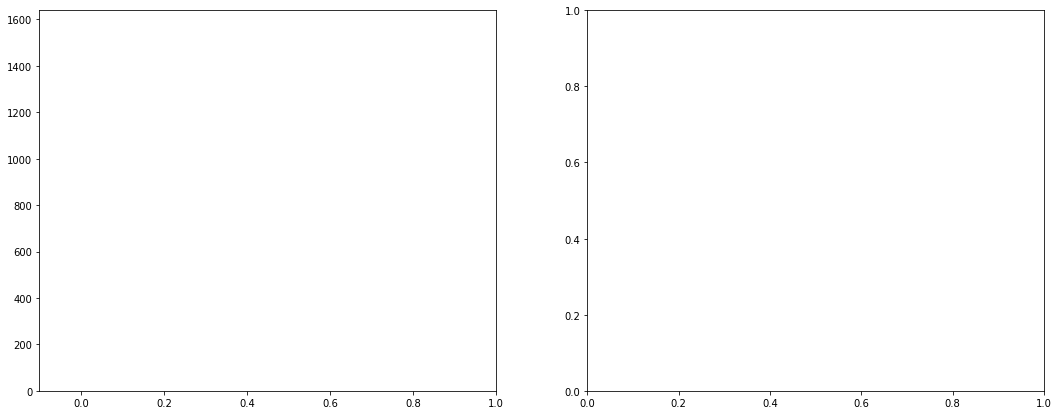

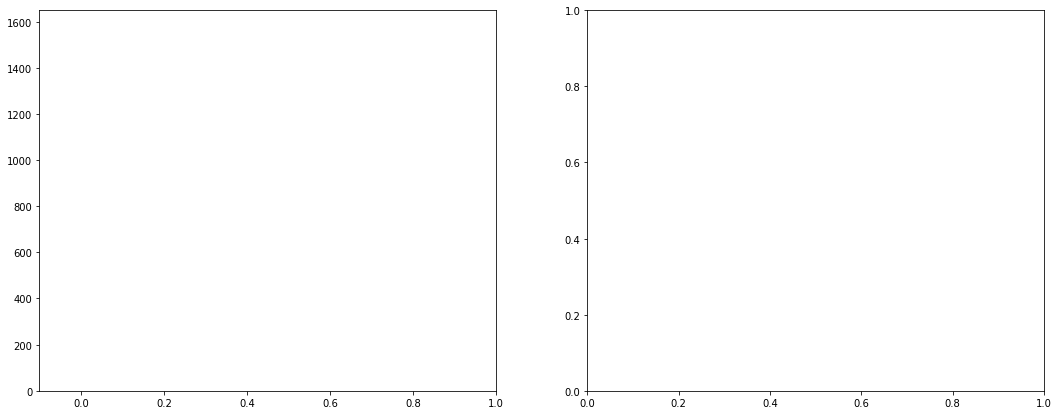

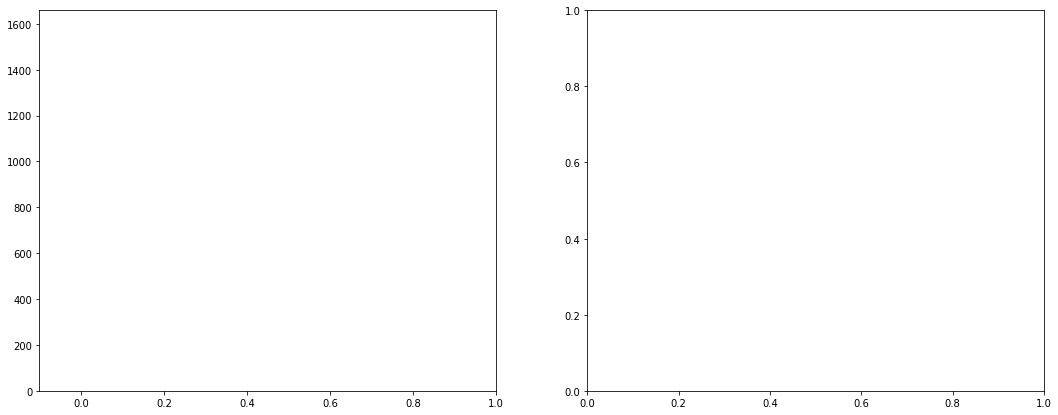

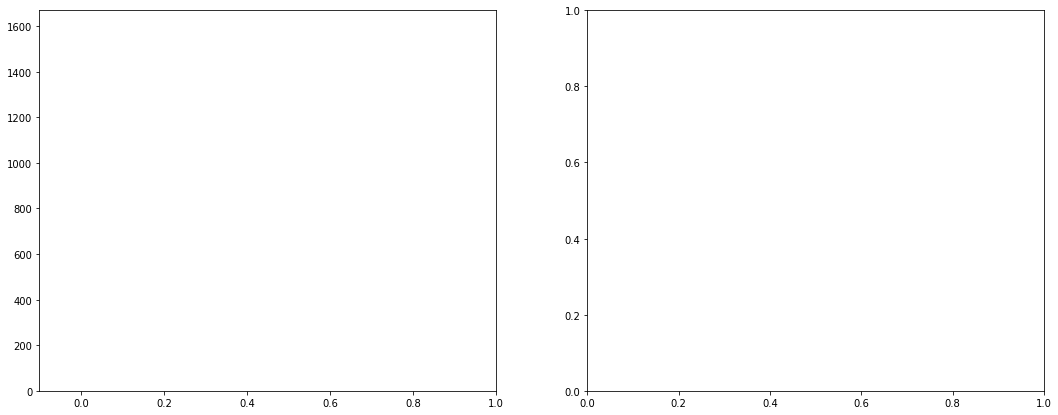

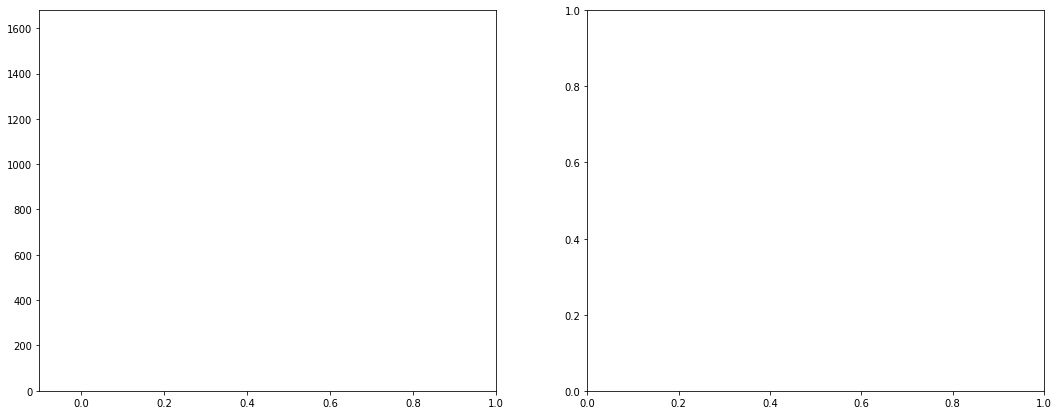

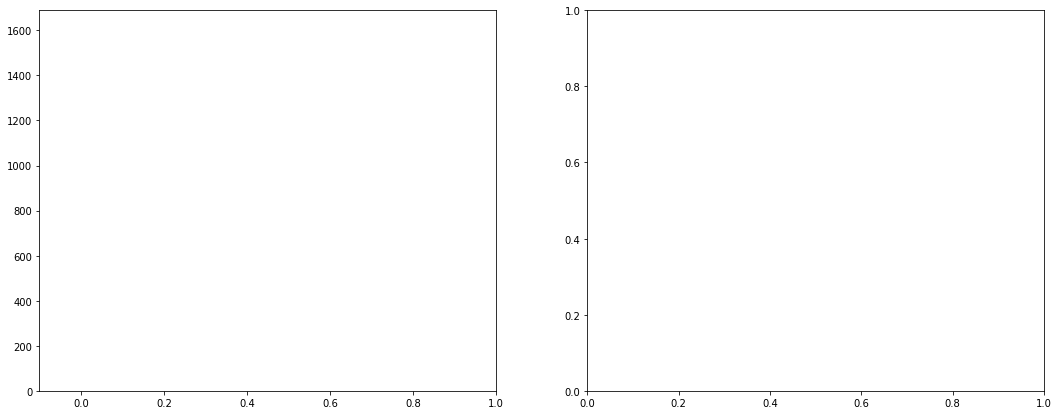

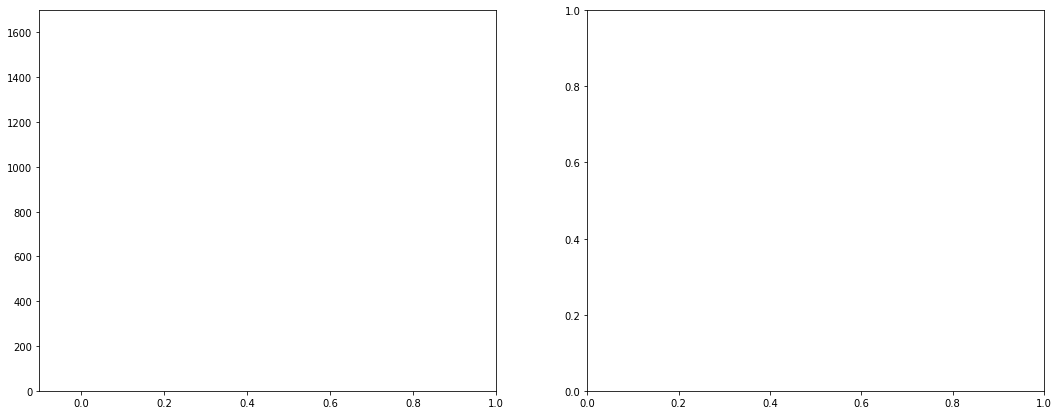

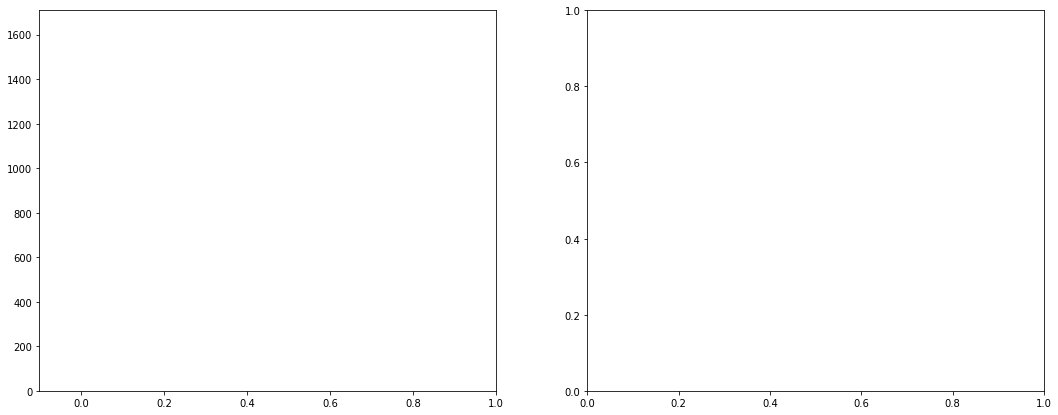

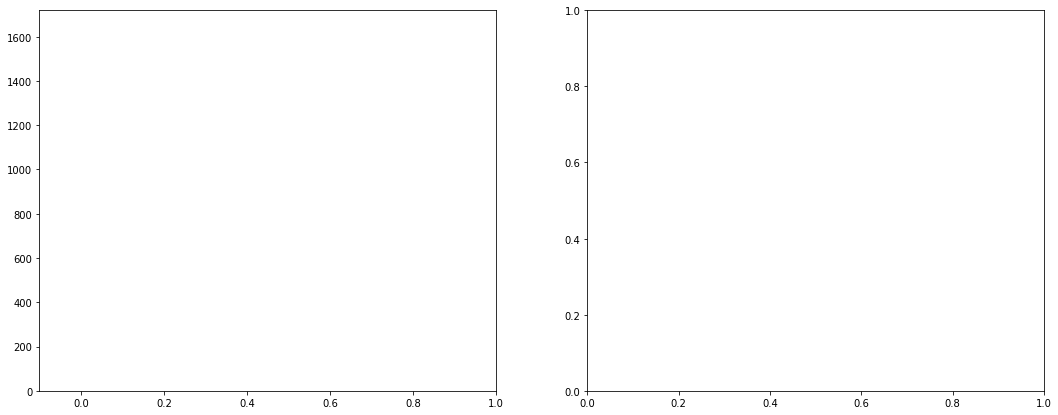

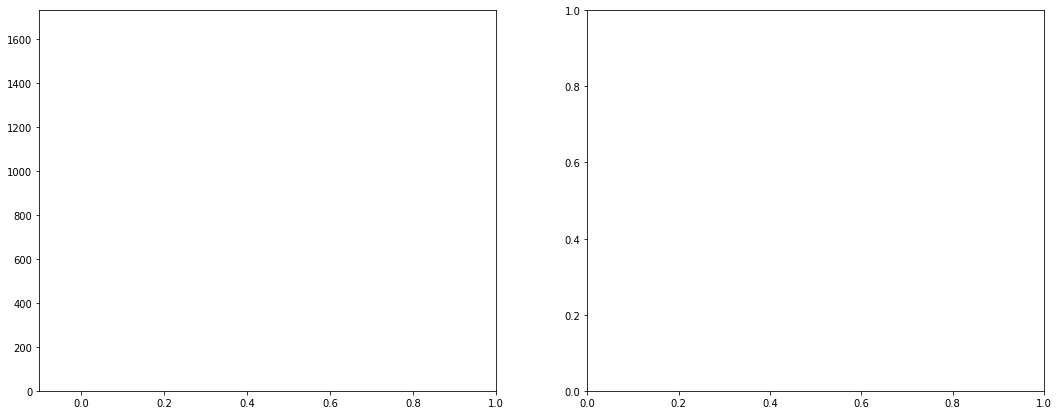

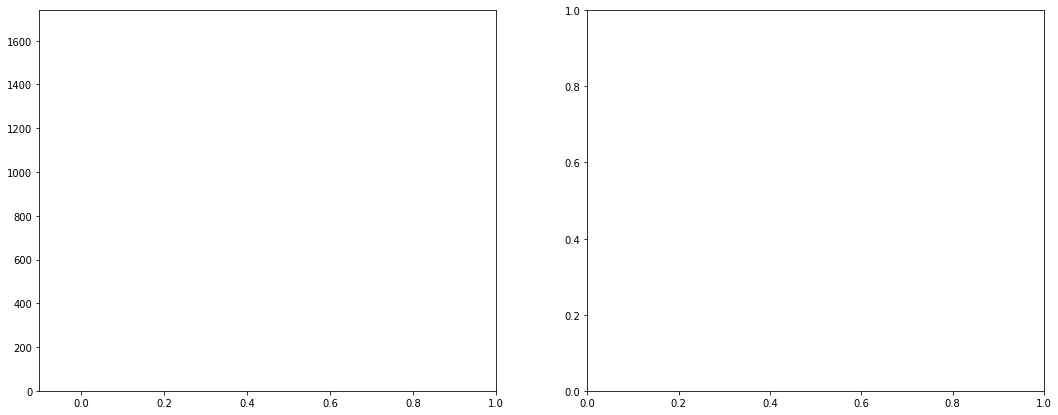

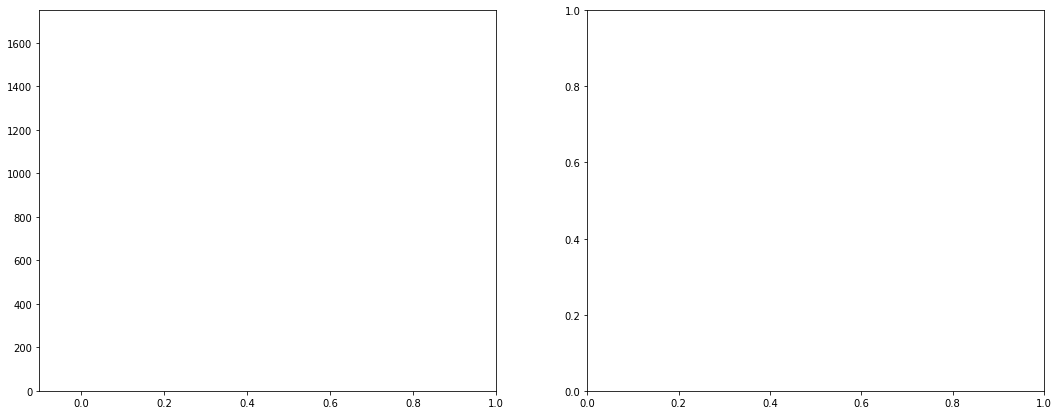

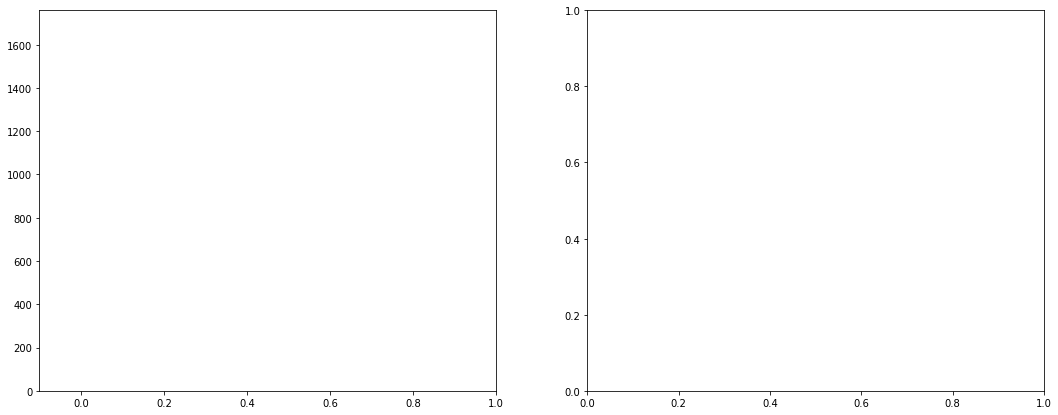

In [44]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

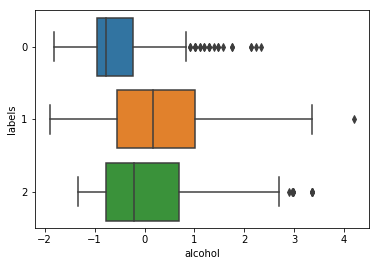

In [26]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)